# Importing Packages

In [1]:
#Data management
import pandas as pd
import numpy as np
np.random.seed(0)
from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [96]:
#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

#Test
from collections import Counter

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shirsendu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [3]:
#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [4]:
tf.__version__

'2.5.0'

In [57]:
plt.style.use('ggplot')
%matplotlib inline
sns.set()

# Importing The Data

In [63]:
#Training Data
path = "data/twitter_training.csv"
trainDf = pd.read_csv(path)


In [64]:
#Test Data (Not to be used until the full model has been trained)
testPath = "data/twitter_validation.csv"
testDf = pd.read_csv(testPath)

# Data Exploration

In [65]:
trainDf.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [66]:
testDf.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Re-import the data

In [67]:
trainDf = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])
testDf = pd.read_csv(testPath, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [68]:
trainDf.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [69]:
testDf.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [70]:
trainDf.shape, testDf.shape

((74682, 4), (1000, 4))

In [71]:
trainDf.describe()

,Tweet_ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [72]:
testDf.describe()

,Tweet_ID
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


## Missing Values

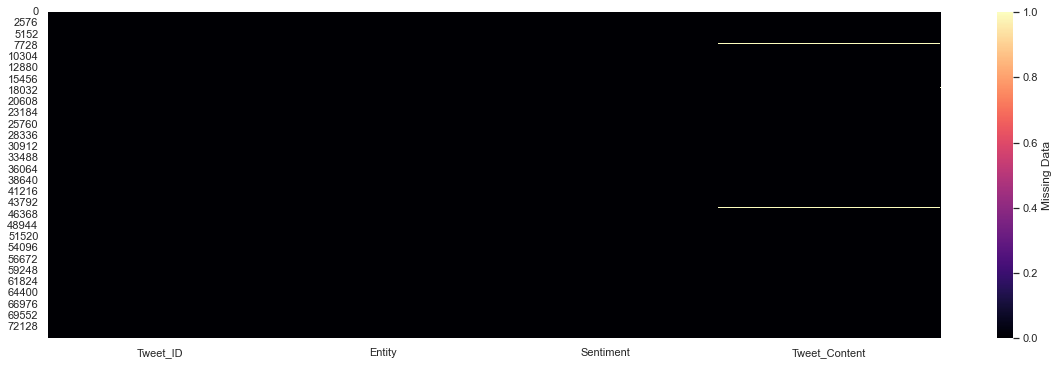

In [73]:
plt.figure(figsize=(20,6))
sns.heatmap(trainDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [74]:
trainDf.isna().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

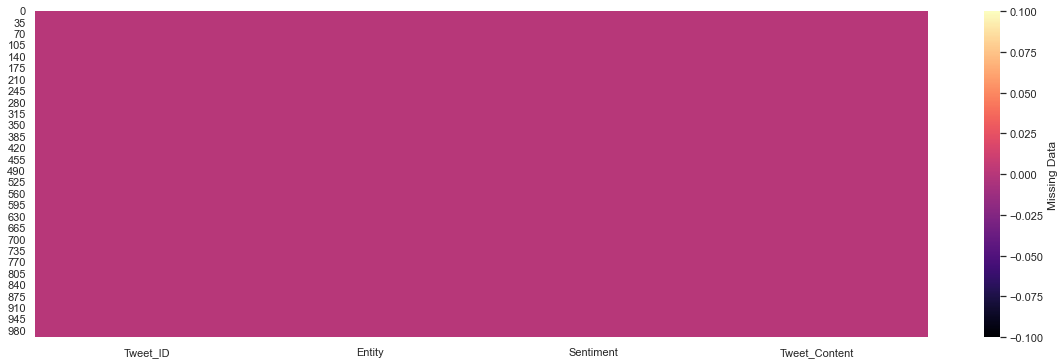

In [75]:
plt.figure(figsize=(20,6))
sns.heatmap(testDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})
plt.show()

In [76]:
testDf.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [77]:
trainDf = trainDf.dropna()

In [78]:
# profile = ProfileReport(trainDf, title="Pandas Profiling Report", explorative=True)
# profile

## Target Classes

<BarContainer object of 4 artists>

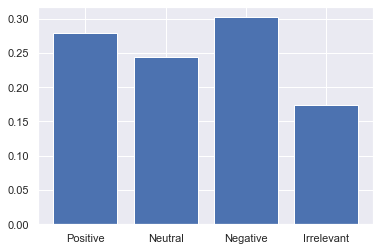

In [79]:
#Checking balance of target classes
sentiments = list(trainDf["Sentiment"].unique())
sentimentNums = [len(trainDf[trainDf["Sentiment"] == sentiment]) / len(trainDf) for sentiment in sentiments]
plt.bar(sentiments, sentimentNums)

<BarContainer object of 32 artists>

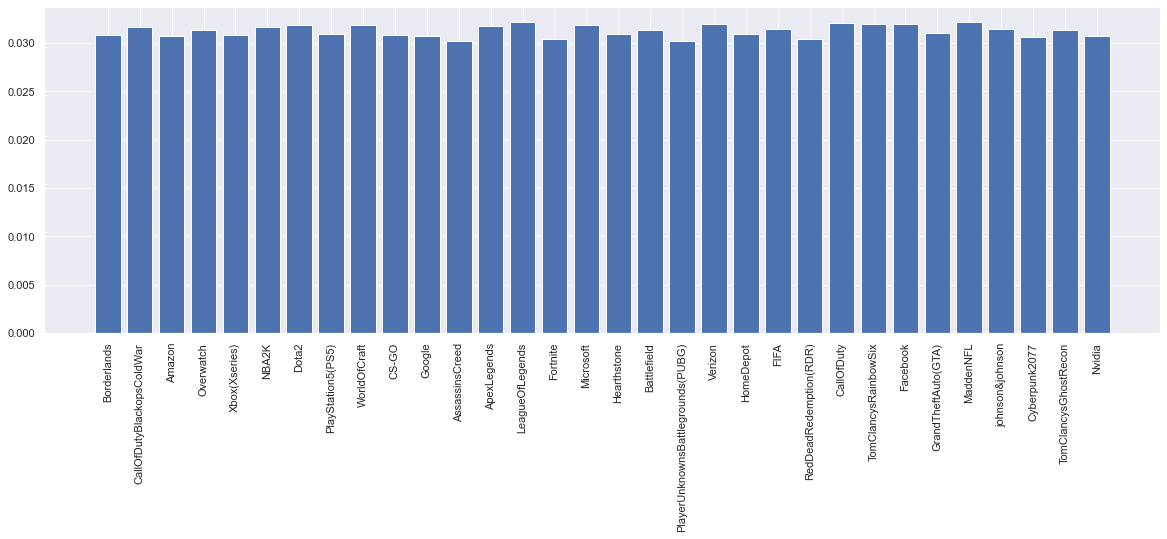

In [80]:
#Checking balance of entity classes
plt.figure(figsize=(20,6))
entities = list(trainDf["Entity"].unique())
entityNums = [len(trainDf[trainDf["Entity"] == entity]) / len(trainDf) for entity in entities]
plt.xticks(rotation=90)
plt.bar(entities, entityNums)

In [81]:
print(trainDf.Entity.unique())
print(len(trainDf.Entity.unique()))

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
32


# Data Cleaning

## One-Hot Encoding

In [82]:
rawDf = trainDf.copy()

In [83]:
#One-hot encode using Pandas' get_dummies()
oneHot = pd.get_dummies(trainDf["Entity"], prefix="Entity")
#Join these new columns back into the DataFrame
trainDf = trainDf.join(oneHot)
#Display a sample of the data with our new columns
trainDf.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
trainDf = trainDf.drop("Entity", axis=1)
trainDf.head()

,Tweet_ID,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,2401,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Labels To Indexes

In [85]:
#Define the indexing for each possible label in a dictionary
labelsToIndex = {"Neutral":0, "Irrelevant":1, "Negative":2, "Positive": 3}

#Creates a reverse dictionary
indexToLabels = dict((v,k) for k, v in labelsToIndex.items())

#Creates lambda functions, applying the appropriate dictionary
getIds = lambda n: np.array([labelsToIndex.get(x) for x in n])
getNames = lambda n: np.array([indexToLabels.get(x) for x in n])

In [87]:
# Function Working Test 
print(getIds(["Positive", "Negative", "Irrelevant", "Neutral"]))
print(getNames([0,1,2,3]))

[3 2 1 0]
['Neutral' 'Irrelevant' 'Negative' 'Positive']


## Target Column Encoding

In [88]:
#Convert the "Sentiment" column into indexes
trainDf["Sentiment"] = getIds(trainDf["Sentiment"])

In [89]:
trainDf.head()

,Tweet_ID,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,...,Entity_Overwatch,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson
0,2401,3,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,3,I am coming to the borders and I will kill you...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,3,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,3,im coming on borderlands and i will murder you...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,3,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# NLP Enrichment

## Handling Stopwords

In [103]:
def removeStopwords(ls):
    #Lemmatises, then removes stop words
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopEnglish) and (word.isalpha())]
    #Joins the words back into a single string
    ls = " ".join(ls)
    return ls

#Splits each string into a list of words
trainDf["Tweet_Content_Split"] = trainDf["Tweet_Content"].apply(word_tokenize)

#Applies the above function to each entry in the DataFrame
lemmatiser = WordNetLemmatizer()
stopEnglish = Counter(stopwords.words()) #Here we use a Counter dictionary on the cached
                                          # list of stop words for a huge speed-up
trainDf["Tweet_Content_Split"] = trainDf["Tweet_Content_Split"].apply(removeStopwords)

In [104]:
trainDf[28:].head()

,Tweet_ID,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,...,Entity_PlayStation5(PS5),Entity_PlayerUnknownsBattlegrounds(PUBG),Entity_RedDeadRedemption(RDR),Entity_TomClancysGhostRecon,Entity_TomClancysRainbowSix,Entity_Verizon,Entity_WorldOfCraft,Entity_Xbox(Xseries),Entity_johnson&johnson,Tweet_Content_Split
28,2405,2,For the biggest male dissappoinment in my life...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,For biggest male dissappoinment life came hang...
29,2405,2,the biggest dissappoinment in my life came bac...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,biggest dissappoinment life came back last yea...
30,2406,3,WE FINISHED BORDERLANDS 3 FINALLY YAS! Thank y...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,WE FINISHED BORDERLANDS FINALLY YAS Thank hang...
31,2406,3,WE FINALLY FINALLY FIND BORDERLANDS 3 YES! Tha...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,WE FINALLY FINALLY FIND BORDERLANDS YES Thank ...
32,2406,3,Thank you for hanging up everyone! It was fun....,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Thank hanging everyone It fun I try get haircu...


## Tokenization

In [105]:
#Define the Tokeniser
tokeniser = Tokenizer(num_words=1000, lower=True)

#Create the corpus by finding the most common 
tokeniser.fit_on_texts(trainDf["Tweet_Content_Split"])

In [112]:
tokeniser

In [106]:
#Tokenise our column of edited Tweet content
tweetTokens = tokeniser.texts_to_matrix(list(trainDf["Tweet_Content_Split"]))

In [108]:
tweetTokens.shape

(73996, 1000)

## Adding Tokens to The Dataframe

In [109]:
print(trainDf.shape)
print(tweetTokens.shape)

(73996, 36)
(73996, 1000)


In [110]:
tokenizedDf = pd.concat([trainDf, pd.DataFrame(tweetTokens)], sort=False, axis=1)
tokenizedDf.shape

(74679, 1036)

In [111]:
tokenizedDf.head()

,Tweet_ID,Sentiment,Tweet_Content,Entity_Amazon,Entity_ApexLegends,Entity_AssassinsCreed,Entity_Battlefield,Entity_Borderlands,Entity_CS-GO,Entity_CallOfDuty,...,990,991,992,993,994,995,996,997,998,999
0,2401.0,3.0,im getting on borderlands and i will murder yo...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2401.0,3.0,I am coming to the borders and I will kill you...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2401.0,3.0,im getting on borderlands and i will kill you ...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2401.0,3.0,im coming on borderlands and i will murder you...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2401.0,3.0,im getting on borderlands 2 and i will murder ...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
